In [328]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
from geopy.geocoders import Nominatim
import folium
import scipy.stats as st
from folium.plugins import MarkerCluster
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
from textwrap import wrap
import random
import warnings
%matplotlib inline

# Historical global trends

In [277]:
# Load,read CO2 Emissions data file and store into pandas Dataframe
#CO2_Emissions_data_to_load = path("Data/CO2_emission.csv")
CO2_Emissions_data = pd.read_csv("Data/CO2_emission.csv")
CO2_Emissions_data.fillna('')

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,ABW,,,,,,,,,...,27.200708,26.947726,27.895023,26.229553,25.915322,24.670529,24.507516,13.157722,8.353561,8.410064
1,Afghanistan,AFG,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,0.107399,0.12341,...,0.051744,0.062428,0.083893,0.151721,0.238399,0.289988,0.406424,0.345149,0.310341,0.293946
2,Angola,AGO,0.100835,0.082204,0.210531,0.202737,0.21356,0.205891,0.268941,0.172102,...,0.985736,1.105019,1.203134,1.185000,1.234425,1.244092,1.252681,1.330219,1.253776,1.290307
3,Albania,ALB,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,1.333055,1.363746,...,1.412498,1.302576,1.322335,1.484311,1.495600,1.578574,1.803715,1.692908,1.749211,1.978763
4,Andorra,AND,,,,,,,,,...,7.299872,6.746052,6.519387,6.427810,6.121580,6.122595,5.867410,5.916884,5.901775,5.832906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Samoa,WSM,0.135028,0.163552,0.158366,0.184026,0.208112,0.230894,0.196437,0.191307,...,0.897739,0.91231,0.946733,0.980465,1.013335,1.005744,1.075831,1.047227,1.038282,1.030158
245,"Yemen, Rep.",YEM,0.683679,0.494324,0.71013,0.525293,0.644143,0.686312,0.595799,0.517041,...,0.996838,1.030386,0.985390,1.020428,1.090827,1.011975,0.826044,0.762823,1.0139,0.878996
246,South Africa,ZAF,5.727221,5.832621,5.88717,5.961336,6.332342,6.616544,6.453861,6.560824,...,8.707407,9.23695,9.498786,9.979458,9.967159,9.256681,9.048936,8.872523,8.68659,8.979062
247,Zambia,ZMB,,,,,0.946606,1.096876,0.951121,1.261961,...,0.192996,0.188267,0.154271,0.168958,0.189800,0.197823,0.209458,0.253506,0.265078,0.292412


In [281]:
# Load,read air pollution data file and store into pandas Dataframe
#air_pollution_data_to_load = path("Data/air_polution.csv")
air_pollution_data = pd.read_csv("Data/air_polution.csv")
air_pollution_data

,Country Name,Country Code,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,65.486792,65.179513,64.922462,64.522683,65.245592,66.835727,66.023174,61.366745,59.010330,61.252656,56.287047,56.910808
1,Angola,AGO,36.448116,35.602908,36.182968,34.962912,33.787247,33.104195,33.415495,34.663923,32.974025,32.729873,31.785389,32.388505
2,Albania,ALB,22.718663,22.029218,21.998248,21.575258,21.277828,22.772537,20.578259,19.938517,18.883955,19.512540,18.189934,18.200603
3,Andorra,AND,14.118742,13.936867,12.594015,12.961378,12.807197,13.273506,12.407053,11.813673,10.830418,11.462178,10.255834,10.307621
4,Arab World,ARB,53.300266,52.543409,53.063076,52.395251,53.787001,52.652279,53.297270,54.053822,52.583603,60.406813,58.764905,58.689259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Samoa,WSM,14.311250,14.296988,14.320470,14.205458,14.288094,14.693096,13.627882,13.382522,12.643560,12.321796,11.366298,11.548027
236,"Yemen, Rep.",YEM,48.863727,50.027716,50.867933,45.144808,45.979470,50.835291,51.434454,52.998443,48.338653,54.260287,50.127626,50.456007
237,South Africa,ZAF,26.120203,26.285373,26.673799,26.322878,27.138587,26.557873,26.577087,26.729262,26.722212,26.112972,25.140416,25.102205
238,Zambia,ZMB,32.764845,30.908466,30.898204,28.947055,28.836379,28.987117,29.742040,29.112221,28.493252,28.375452,27.355674,27.438035


In [284]:
# Load,read population data file and store into pandas Dataframe
population_data= pd.read_csv("Data/population.csv")
population_data

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0
1,Afghanistan,AFG,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,...,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0
2,Angola,AGO,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,...,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,...,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0,1845300.0
260,"Yemen, Rep.",YEM,5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,5816247.0,5907874.0,...,22516460.0,23154855.0,23807588.0,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0
261,South Africa,ZAF,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,19888250.0,20406864.0,...,50477011.0,51216964.0,52004172.0,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0
262,Zambia,ZMB,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,3681955.0,3797873.0,...,13215139.0,13605984.0,14023193.0,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0


In [286]:
# Combine the data into a single dataset.  
combined_data = pd.merge(CO2_Emissions_data,air_pollution_data,how="left", on="Country Name")
combined_data.fillna(' ')

,Country Name,Country Code_x,1960,1961,1962,1963,1964,1965,1966,1967,...,2000_y,2005_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015,2016,2017
0,Aruba,ABW,,,,,,,,,...,,,,,,,,,,
1,Afghanistan,AFG,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,0.107399,0.12341,...,64.922462,64.522683,65.245592,66.835727,66.023174,61.366745,59.01033,61.252656,56.287047,56.910808
2,Angola,AGO,0.100835,0.082204,0.210531,0.202737,0.21356,0.205891,0.268941,0.172102,...,36.182968,34.962912,33.787247,33.104195,33.415495,34.663923,32.974025,32.729873,31.785389,32.388505
3,Albania,ALB,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,1.333055,1.363746,...,21.998248,21.575258,21.277828,22.772537,20.578259,19.938517,18.883955,19.51254,18.189934,18.200603
4,Andorra,AND,,,,,,,,,...,12.594015,12.961378,12.807197,13.273506,12.407053,11.813673,10.830418,11.462178,10.255834,10.307621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Samoa,WSM,0.135028,0.163552,0.158366,0.184026,0.208112,0.230894,0.196437,0.191307,...,14.32047,14.205458,14.288094,14.693096,13.627882,13.382522,12.64356,12.321796,11.366298,11.548027
245,"Yemen, Rep.",YEM,0.683679,0.494324,0.71013,0.525293,0.644143,0.686312,0.595799,0.517041,...,50.867933,45.144808,45.97947,50.835291,51.434454,52.998443,48.338653,54.260287,50.127626,50.456007
246,South Africa,ZAF,5.727221,5.832621,5.88717,5.961336,6.332342,6.616544,6.453861,6.560824,...,26.673799,26.322878,27.138587,26.557873,26.577087,26.729262,26.722212,26.112972,25.140416,25.102205
247,Zambia,ZMB,,,,,0.946606,1.096876,0.951121,1.261961,...,30.898204,28.947055,28.836379,28.987117,29.74204,29.112221,28.493252,28.375452,27.355674,27.438035


In [287]:
# Checking the number of unique countries.
countries = combined_data["Country Name"].nunique()
countries

249

In [288]:
data_df = pd.DataFrame()
 #data_df.append({'Mean': your_mean_val, 'Year': i})
for i in CO2_Emissions_data.columns[2:]:
    #print(CO2_Emissions_data[i].mean(),i)
    data_df =  data_df.append({'Mean':CO2_Emissions_data[i].mean() , 'Year': i}, ignore_index=True)
data_df
#print(data_df)

C:\Users\user\AppData\Local\Temp\ipykernel_15196\1124880067.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df =  data_df.append({'Mean':CO2_Emissions_data[i].mean() , 'Year': i}, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15196\1124880067.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df =  data_df.append({'Mean':CO2_Emissions_data[i].mean() , 'Year': i}, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15196\1124880067.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df =  data_df.append({'Mean':CO2_Emissions_data[i].mean() , 'Year': i}, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15196\1124880067.py:5: FutureWarning: The frame.append method is d

C:\Users\user\AppData\Local\Temp\ipykernel_15196\1124880067.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df =  data_df.append({'Mean':CO2_Emissions_data[i].mean() , 'Year': i}, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15196\1124880067.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df =  data_df.append({'Mean':CO2_Emissions_data[i].mean() , 'Year': i}, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15196\1124880067.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df =  data_df.append({'Mean':CO2_Emissions_data[i].mean() , 'Year': i}, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15196\1124880067.py:5: FutureWarning: The frame.append method is d

,Mean,Year
0,2.037282,1960
1,2.150171,1961
2,2.241690,1962
3,2.753812,1963
4,2.916141,1964
5,3.035673,1965
6,3.049316,1966
7,3.116120,1967
8,3.315619,1968
9,3.927816,1969


In [289]:
CO2_Emissions_data.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
count,193.000000,194.000000,196.000000,197.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,...,247.000000,248.000000,249.000000,249.000000,249.000000,249.000000,249.000000,248.000000,248.000000,247.000000
mean,2.037282,2.150171,2.241690,2.753812,2.916141,3.035673,3.049316,3.116120,3.315619,3.927816,...,4.826155,4.901256,4.930568,4.935583,4.721868,4.847677,4.811059,4.774684,4.715702,4.713566
std,4.184849,4.377180,4.717044,8.443484,8.493180,8.706497,8.062852,7.263779,7.187105,9.921855,...,6.408915,6.528367,6.353846,6.134005,5.811829,5.858565,5.786095,5.698496,5.489266,5.649151
min,0.007984,0.007857,0.008435,0.009336,0.011589,0.011851,0.013248,0.011791,-0.020098,0.016104,...,0.020912,0.024582,0.023787,0.023466,0.022707,0.024515,0.027016,0.030539,0.030365,0.044700
25%,0.183316,0.180620,0.198531,0.199338,0.214492,0.233321,0.242972,0.251838,0.280633,0.320451,...,0.859606,0.808379,0.898907,0.816057,0.827852,0.815799,0.832929,0.836263,0.870442,0.881858
50%,0.612271,0.636830,0.654542,0.640002,0.765958,0.695949,0.750375,0.802935,1.004495,1.056845,...,2.757264,2.929917,2.823702,3.029991,2.939359,2.935527,2.951649,3.026686,3.040313,3.080994
75%,1.694988,1.726250,1.939525,1.710527,1.998806,2.190061,2.455830,2.923741,3.257972,3.597430,...,7.037947,7.052989,6.916701,7.010559,6.413945,6.642697,6.715381,6.556099,6.587639,6.382044
max,36.685183,36.583778,42.360705,99.464612,92.860862,85.458585,78.625153,77.502352,75.967182,101.051663,...,58.881084,62.066185,51.933672,45.134782,41.827221,39.059708,39.509205,42.860375,36.387918,43.857308


In [290]:
# Set x axis using average of CO2 Emissions
average_CO2_Emissions = CO2_Emissions_data.mean()

C:\Users\user\AppData\Local\Temp\ipykernel_15196\446875968.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  average_CO2_Emissions = CO2_Emissions_data.mean()


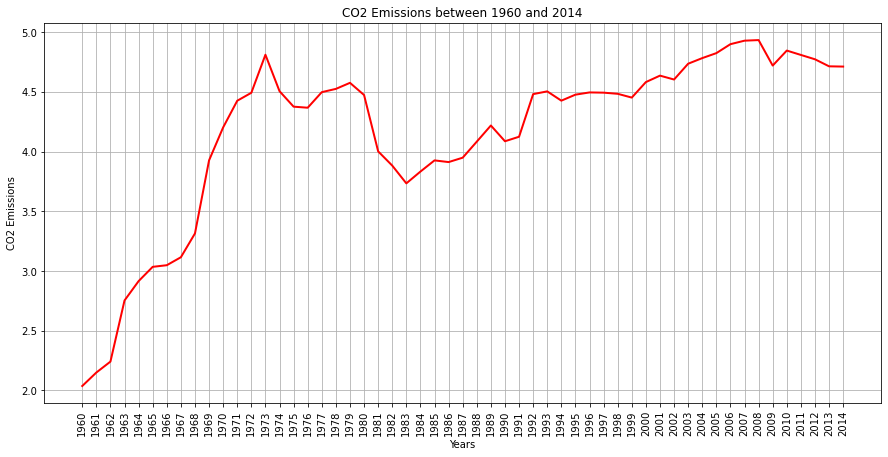

In [291]:
# create a line graph to show the trend in CO2 emissions across years
plt.figure(figsize=(15,7))
plt.plot(average_CO2_Emissions, color="red",linewidth=2, markersize=12)
plt.title("CO2 Emissions between 1960 and 2014")
plt.xlabel('Years')
plt.ylabel('CO2 Emissions')
plt.xticks(rotation="vertical")
plt.grid(True)

plt.show()

In [292]:
air_pollution_data.describe()

,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,31.191227,30.880535,30.930976,30.651390,30.872419,31.131758,30.341223,29.791601,28.684503,30.580610,29.162507,29.292969
std,17.311708,17.402537,17.357984,17.366315,17.978061,17.942650,17.788221,17.733536,17.165637,19.578062,19.035097,19.320948
min,6.732298,6.839568,6.884514,7.037087,7.152866,7.283700,6.601134,6.278689,6.180830,6.063834,5.893757,5.861331
25%,17.516553,17.283022,17.171255,16.884979,17.043463,17.362182,16.255018,15.809037,15.171312,15.513597,14.489949,14.572962
50%,27.138556,26.602144,26.868557,26.823621,27.004787,27.453521,25.948751,25.442579,24.193790,24.441082,23.079150,22.874830
75%,42.145449,42.099383,41.696393,39.858605,39.433401,40.142818,40.863400,40.343259,39.558239,43.877208,40.775888,40.966942
max,91.636389,90.687164,88.943022,93.218248,100.784428,100.766061,96.963291,95.313986,98.116017,97.432289,98.054714,99.734374


In [293]:
air_pollution_data= air_pollution_data.mean()
air_pollution_data

C:\Users\user\AppData\Local\Temp\ipykernel_15196\1629268294.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  air_pollution_data= air_pollution_data.mean()


1990    31.191227
1995    30.880535
2000    30.930976
2005    30.651390
2010    30.872419
2011    31.131758
2012    30.341223
2013    29.791601
2014    28.684503
2015    30.580610
2016    29.162507
2017    29.292969
dtype: float64

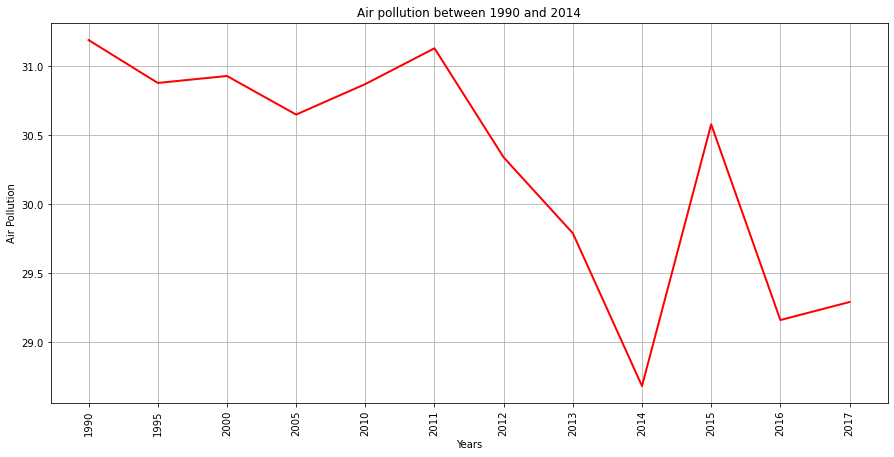

In [294]:
# create a line graph to show the trend in CO2 emissions across years
plt.figure(figsize=(15,7))
plt.plot(air_pollution_data, color="red",linewidth=2, markersize=12)
plt.title("Air pollution between 1990 and 2014")
plt.xlabel('Years')
plt.ylabel('Air Pollution')
plt.xticks(rotation="vertical")
plt.grid(True)

plt.show()

In [295]:
population_data.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,...,2.630000e+02,2.630000e+02,2.630000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02
mean,1.180664e+08,1.196487e+08,1.217640e+08,1.243969e+08,1.270502e+08,1.297689e+08,1.326321e+08,1.354859e+08,1.383920e+08,1.414415e+08,...,2.736941e+08,2.771861e+08,2.806647e+08,2.852876e+08,2.889023e+08,2.925508e+08,2.962148e+08,2.999114e+08,3.035995e+08,3.072302e+08
std,3.730942e+08,3.775621e+08,3.841278e+08,3.926847e+08,4.012844e+08,4.101198e+08,4.195221e+08,4.288621e+08,4.384146e+08,4.484547e+08,...,8.714798e+08,8.819670e+08,8.924886e+08,9.047110e+08,9.155191e+08,9.264022e+08,9.373108e+08,9.483019e+08,9.592829e+08,9.700134e+08
min,3.893000e+03,3.989000e+03,4.076000e+03,4.183000e+03,4.308000e+03,4.468000e+03,4.685000e+03,4.920000e+03,5.193000e+03,5.459000e+03,...,9.939000e+03,1.000500e+04,1.005700e+04,1.027900e+04,1.082100e+04,1.097200e+04,1.109900e+04,1.122500e+04,1.137000e+04,1.150800e+04
25%,5.022908e+05,5.109635e+05,5.206552e+05,5.311588e+05,5.421285e+05,5.533358e+05,5.647510e+05,5.823600e+05,5.981080e+05,6.100040e+05,...,1.409218e+06,1.427037e+06,1.449584e+06,1.409858e+06,1.427339e+06,1.444866e+06,1.463189e+06,1.514952e+06,1.577592e+06,1.638404e+06
50%,3.658470e+06,3.738358e+06,3.821016e+06,3.926268e+06,4.051891e+06,4.180652e+06,4.275565e+06,4.344568e+06,4.415026e+06,4.455048e+06,...,9.142259e+06,9.378126e+06,9.460830e+06,9.624311e+06,9.746730e+06,9.855382e+06,1.000153e+07,1.012427e+07,1.017900e+07,1.023247e+07
75%,2.532671e+07,2.611452e+07,2.690411e+07,2.766416e+07,2.839934e+07,2.913676e+07,2.988608e+07,3.059503e+07,3.120239e+07,3.179527e+07,...,5.036369e+07,5.090889e+07,5.149739e+07,5.247893e+07,5.323004e+07,5.397970e+07,5.470996e+07,5.541544e+07,5.641631e+07,5.741430e+07
max,3.032020e+09,3.073078e+09,3.126066e+09,3.191186e+09,3.256700e+09,3.323624e+09,3.393699e+09,3.463147e+09,3.533537e+09,3.608236e+09,...,6.840592e+09,6.922947e+09,7.004011e+09,7.086994e+09,7.170962e+09,7.255654e+09,7.340548e+09,7.426103e+09,7.510990e+09,7.594270e+09


In [296]:
population_data= population_data.mean()
population_data

C:\Users\user\AppData\Local\Temp\ipykernel_15196\3431706427.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  population_data= population_data.mean()


1960    1.180664e+08
1961    1.196487e+08
1962    1.217640e+08
1963    1.243969e+08
1964    1.270502e+08
1965    1.297689e+08
1966    1.326321e+08
1967    1.354859e+08
1968    1.383920e+08
1969    1.414415e+08
1970    1.445351e+08
1971    1.477081e+08
1972    1.508419e+08
1973    1.539544e+08
1974    1.570764e+08
1975    1.601383e+08
1976    1.631507e+08
1977    1.661518e+08
1978    1.692042e+08
1979    1.723298e+08
1980    1.754950e+08
1981    1.787447e+08
1982    1.821253e+08
1983    1.855458e+08
1984    1.889633e+08
1985    1.924484e+08
1986    1.960375e+08
1987    1.997200e+08
1988    2.034436e+08
1989    2.071619e+08
1990    2.093606e+08
1991    2.130044e+08
1992    2.173702e+08
1993    2.209283e+08
1994    2.244529e+08
1995    2.271145e+08
1996    2.305779e+08
1997    2.340331e+08
1998    2.365510e+08
1999    2.399128e+08
2000    2.432487e+08
2001    2.465676e+08
2002    2.498812e+08
2003    2.532106e+08
2004    2.565610e+08
2005    2.599343e+08
2006    2.633316e+08
2007    2.667

In [297]:
# Create a dataframe for CO2 emissions
CO2_Emissions_data = pd.DataFrame(average_CO2_Emissions)

In [298]:
# Rename the dataframe
CO2_Emissions_data = CO2_Emissions_data.rename(columns = {0:"Mean_CO2"})
CO2_Emissions_data

,Mean_CO2
1960,2.037282
1961,2.150171
1962,2.241690
1963,2.753812
1964,2.916141
1965,3.035673
1966,3.049316
1967,3.116120
1968,3.315619
1969,3.927816


In [299]:
# Create a dataframe for air pollution
air_pollution_mean = pd.DataFrame(air_pollution_data)

In [300]:
# Rename the dataframe
air_pollution_mean = air_pollution_mean.rename(columns = {0:"Mean_Pollution"})
air_pollution_mean

,Mean_Pollution
1990,31.191227
1995,30.880535
2000,30.930976
2005,30.651390
2010,30.872419
2011,31.131758
2012,30.341223
2013,29.791601
2014,28.684503
2015,30.580610


In [301]:
# Merge the dataframes
CO2_pollution = pd.merge(air_pollution_mean, CO2_Emissions_data, left_index=True, right_index=True)
CO2_pollution

,Mean_Pollution,Mean_CO2
1990,31.191227,4.087860
1995,30.880535,4.478244
2000,30.930976,4.583647
2005,30.651390,4.826155
2010,30.872419,4.847677
2011,31.131758,4.811059
2012,30.341223,4.774684
2013,29.791601,4.715702
2014,28.684503,4.713566


<Figure size 1080x504 with 0 Axes>

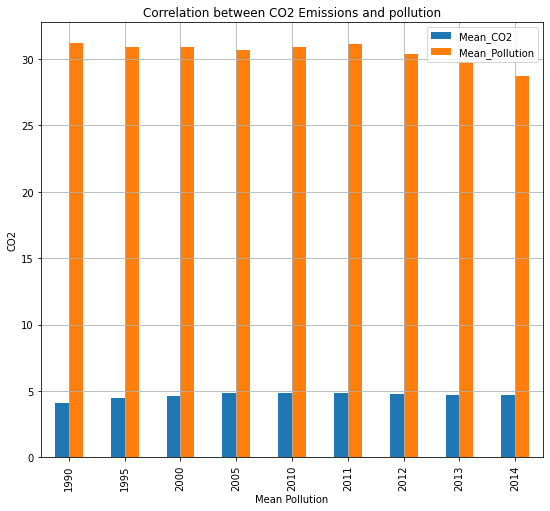

In [302]:
# Create a bar chart to show the correlation between mean CO2 emissions and mean pollution
plt.figure(figsize=(15,7))
CO2_pollution.plot( y=["Mean_CO2", "Mean_Pollution"], kind="bar", figsize=(9, 8))
plt.title("Correlation between CO2 Emissions and pollution")
plt.xlabel('Mean Pollution')
plt.ylabel('CO2')
#plt.xticks(rotation="vertical")
plt.grid(True)

In [304]:
# Create a dataframe for population
population_mean = pd.DataFrame(population_data)

In [306]:
# Rename the dataframe
population_mean = population_mean.rename(columns = {0:"Mean_population"})
population_mean

,Mean_population
1960,1.180664e+08
1961,1.196487e+08
1962,1.217640e+08
1963,1.243969e+08
1964,1.270502e+08
1965,1.297689e+08
1966,1.326321e+08
1967,1.354859e+08
1968,1.383920e+08
1969,1.414415e+08


In [307]:
# Merge the dataframes
CO2_population = pd.merge(population_mean, CO2_Emissions_data, left_index=True, right_index=True)
CO2_population

,Mean_population,Mean_CO2
1960,1.180664e+08,2.037282
1961,1.196487e+08,2.150171
1962,1.217640e+08,2.241690
1963,1.243969e+08,2.753812
1964,1.270502e+08,2.916141
1965,1.297689e+08,3.035673
1966,1.326321e+08,3.049316
1967,1.354859e+08,3.116120
1968,1.383920e+08,3.315619
1969,1.414415e+08,3.927816


<Figure size 1080x504 with 0 Axes>

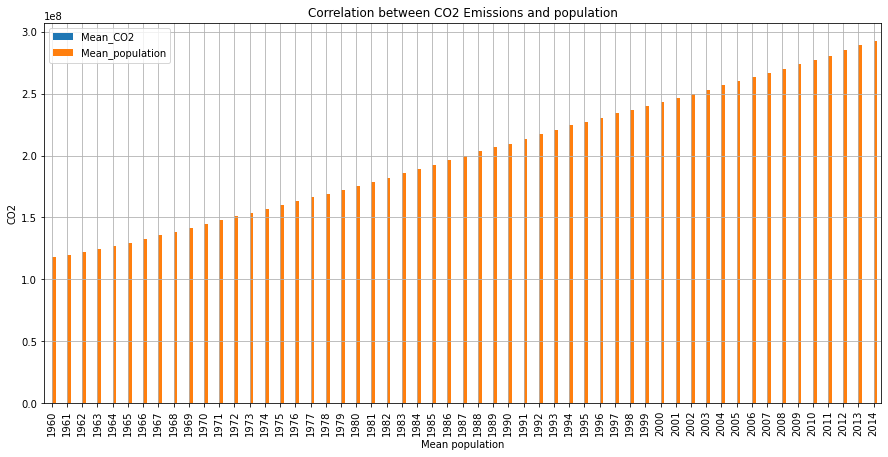

In [308]:
# Create a bar chart to show the correlation between mean CO2 emissions and population
plt.figure(figsize=(15,7))
CO2_population.plot( y=["Mean_CO2", "Mean_population"], kind="bar", figsize=(15, 7))
plt.title("Correlation between CO2 Emissions and population")
plt.xlabel('Mean population')
plt.ylabel('CO2')
#plt.xticks(rotation="vertical")
plt.grid(True)

# Growing trend and main contributors

In [312]:
#set the path of the file and read co2 emission data using panda
url_co2 ='Data/owid-co2-data.csv'
data_df1= pd.read_csv('Data/owid-co2-data.csv')
df_columns= data_df1.columns
df_columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [313]:
data_df1.fillna('')

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,,,,,,,...,,,,,,,,,,
1,Afghanistan,1851,AFG,3769828.0,,,,,,,...,,0.165,0.0,0.0,0.0,0.0,,,,
2,Afghanistan,1852,AFG,3787706.0,,,,,,,...,,0.164,0.0,0.0,0.0,0.0,,,,
3,Afghanistan,1853,AFG,3806634.0,,,,,,,...,,0.164,0.0,0.0,0.0,0.0,,,,
4,Afghanistan,1854,AFG,3825655.0,,,,,,,...,,0.163,0.0,0.0,0.0,0.0,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50593,Zimbabwe,2017,ZWE,14751101.0,21947836416.0,0.469,0.032,9.596,-0.937,-8.899,...,,0.114,0.001,0.001,0.002,0.0,115.59,28.3,0.91,9.486
50594,Zimbabwe,2018,ZWE,15052191.0,22715353088.0,0.558,0.037,11.795,2.199,22.92,...,,0.114,0.001,0.001,0.002,0.0,118.22,30.83,0.771,6.537
50595,Zimbabwe,2019,ZWE,15354606.0,,0.57,0.037,11.115,-0.681,-5.772,...,,0.113,0.001,0.001,0.002,0.0,117.96,30.53,0.978,8.795
50596,Zimbabwe,2020,ZWE,15669663.0,,0.57,0.036,10.608,-0.507,-4.559,...,,0.112,0.001,0.001,0.002,0.0,,,1.006,9.481


In [314]:
#read co2 emission data using panda
#part_co2_data = data_df(data='co2',
                 # index='country',
                  # columns='year')
co2_data = data_df1.groupby('year', as_index=False)['co2'].sum()
co2_data 

,year,co2
0,1750,56.106
1,1751,56.106
2,1752,56.124
3,1753,56.124
4,1754,56.148
...,...,...
267,2017,234499.240
268,2018,238740.111
269,2019,239924.367
270,2020,228765.046


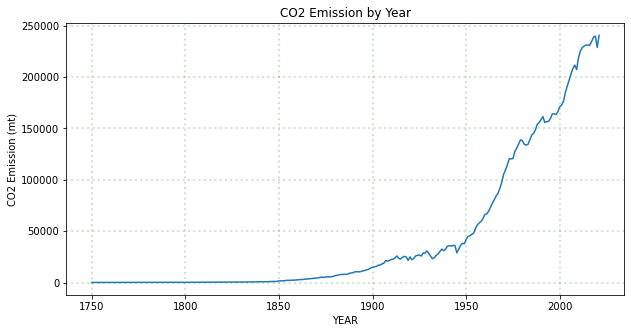

In [315]:
#plot world co2 emission 1750-2022
plt.rcParams['figure.figsize'] = [10, 5]
x_axis = co2_data['year']
y_axis = co2_data['co2']
plt.plot(x_axis,y_axis)

plt.grid(color='g', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel('YEAR')
plt.ylabel('CO2 Emission (mt)')
plt.title('CO2 Emission by Year')
plt.show()

In [316]:
#set the path of the file and read source data using panda
part_source_data = data[['year','cement_co2','coal_co2','gas_co2','oil_co2']]
co2_source = part_source_data.groupby('year', as_index =False).sum()
co2_source = co2_source[co2_source['year'] > 1949]
co2_source.head()

,year,cement_co2,coal_co2,gas_co2,oil_co2
200,1950,339.920,19813.874,1461.781,7115.037
201,1951,385.133,21039.093,1719.890,7478.000
202,1952,412.174,20933.686,1848.911,7925.124
203,1953,457.938,21145.531,1968.999,8459.941
204,1954,497.146,21356.794,2084.551,9066.777


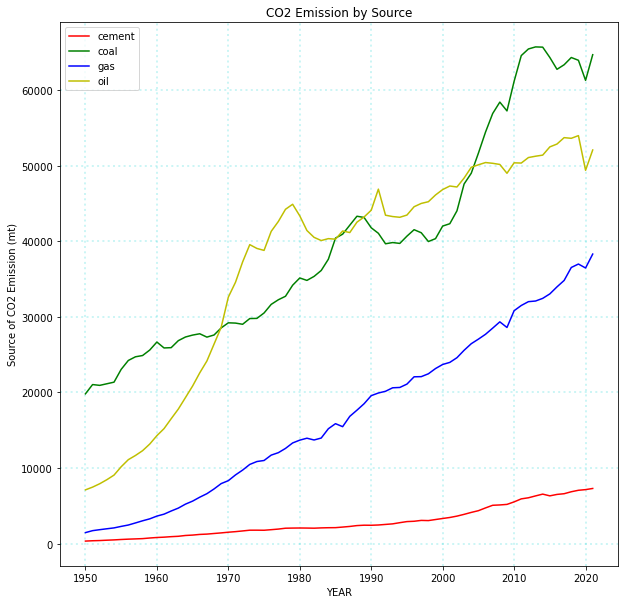

In [320]:
#plot source co2 emission 1750-2022
x_axis = co2_source['year']
plt.rcParams['figure.figsize'] = [10, 10]
y_cement_axis = co2_source['cement_co2']
y_coal_axis = co2_source['coal_co2']
y_gas_axis = co2_source['gas_co2']
y_oil_axis = co2_source['oil_co2']
#plt.rcParams['figure.figsize'] = [12/2.54, 10/2.54]
plt.plot(x_axis, y_cement_axis, color='r', label='cement')
plt.plot(x_axis, y_coal_axis, color='g', label='coal')
plt.plot(x_axis, y_gas_axis, color='b', label='gas')
plt.plot(x_axis, y_oil_axis, color='y', label='oil')
plt.grid(color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel('YEAR')
plt.ylabel('Source of CO2 Emission (mt)')
plt.title('CO2 Emission by Source')
plt.legend()
plt.show()

In [321]:
#set the path of the file and read source data using panda
part_country_data = data[['country','year','co2']]
co2_country = part_country_data[part_country_data['year'] == 2020]
co2_country = co2_country.groupby('country', as_index =False)['co2'].sum()
countries = co2_country['country']
countries

0         Afghanistan
1              Africa
2        Africa (GCP)
3       Aland Islands
4             Albania
            ...      
266    Western Sahara
267             World
268             Yemen
269            Zambia
270          Zimbabwe
Name: country, Length: 271, dtype: object

In [322]:
country_code = []
#function to convert to alpah2 country codes
for country in countries:
    try:
        cn_a2_code =  country_name_to_country_alpha2(country)
    except:
        cn_a2_code = 'Unknown'
    country_code.append(cn_a2_code)
co2_country['country_code'] = country_code
co2_country

,country,co2,country_code
0,Afghanistan,11.682,AF
1,Africa,1385.889,Unknown
2,Africa (GCP),1385.877,Unknown
3,Aland Islands,0.000,Unknown
4,Albania,4.729,AL
...,...,...,...
266,Western Sahara,0.000,EH
267,World,35264.086,Unknown
268,Yemen,12.140,YE
269,Zambia,7.281,ZM


In [325]:
co2_country_present = co2_country.query('country_code != "Unknown"')
count_code = co2_country_present['country_code']
country_lat = []
country_lon = []

#function to get longitude and latitude data from country name
geolocator = Nominatim(user_agent="Geolocation")
for country_code in count_code:
    try:
        # Geolocate the center of the country
        # And return latitude and longitude
        loc = geolocator.geocode(country_code)        
    except:
        # Return missing value
        np.nan
    country_lat.append(loc.latitude)
    country_lon.append(loc.longitude)
co2_country_present['Latitude'] = country_lat
co2_country_present['Longitude'] = country_lon

co2_country_present

C:\Users\user\AppData\Local\Temp\ipykernel_15196\2525012182.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2_country_present['Latitude'] = country_lat
C:\Users\user\AppData\Local\Temp\ipykernel_15196\2525012182.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2_country_present['Longitude'] = country_lon


,country,co2,country_code,Latitude,Longitude
0,Afghanistan,11.682,AF,33.768006,66.238514
4,Albania,4.729,AL,33.258882,-86.829534
5,Algeria,172.504,DZ,28.000027,2.999983
6,American Samoa,0.000,AS,26.407384,93.255130
7,Andorra,0.449,AD,42.540717,1.573203
...,...,...,...,...,...
265,Wallis and Futuna,0.027,WF,35.125119,0.357856
266,Western Sahara,0.000,EH,23.340694,-13.129133
268,Yemen,12.140,YE,16.347124,47.891527
269,Zambia,7.281,ZM,-14.518912,27.558988


In [331]:
# Create a world map to show distributions of users
world_map= folium.Map(tiles="cartodbpositron")

#empty map
marker_cluster = MarkerCluster().add_to(world_map)

#for each coordinate, create circlemarker of user percent
for i in range(len(co2_country_present)):
        lat = co2_country_present.iloc[i]['Latitude']
        long = co2_country_present.iloc[i]['Longitude']
        radius=5
        popup_text = """Country : {}<br>
                    CO2 usage in 2021 : {}<br>"""
        popup_text = popup_text.format(co2_country_present.iloc[i]['country'], co2_country_present.iloc[i]['co2'])
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

# Correlations and comparisons

In [330]:
#Data frame 
file_one_df1 = pd.read_csv("Data/owid-co2-data.csv", encoding="ISO-8859-1")
file_one_df1.head(-1)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50592,Zimbabwe,2016,ZWE,14452705.0,2.096179e+10,0.461,0.032,10.533,-1.722,-14.047,...,NaN,0.115,0.001,0.001,0.002,0.0,115.92,28.53,1.404,13.330
50593,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.114,0.001,0.001,0.002,0.0,115.59,28.30,0.910,9.486
50594,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.114,0.001,0.001,0.002,0.0,118.22,30.83,0.771,6.537
50595,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.113,0.001,0.001,0.002,0.0,117.96,30.53,0.978,8.795


In [332]:
#creating a new dataframe starting from year 2000 to onward
cleaned_data1=file_one_df1.loc[file_one_df1['year'] >= 2000]
cleaned_data1.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
150,Afghanistan,2000,AFG,19542986.0,1.128379e+10,0.010,0.001,1.047,-0.045,-4.078,...,NaN,0.080,0.0,0.0,0.001,0.0,11.50,13.89,NaN,NaN
151,Afghanistan,2001,AFG,19688634.0,1.102127e+10,0.007,0.000,1.069,0.022,2.098,...,NaN,0.079,0.0,0.0,0.001,0.0,12.37,12.25,NaN,NaN
152,Afghanistan,2002,AFG,21000258.0,1.880487e+10,0.011,0.001,1.341,0.272,25.432,...,NaN,0.078,0.0,0.0,0.001,0.0,15.01,14.89,NaN,NaN
153,Afghanistan,2003,AFG,22645136.0,2.107434e+10,0.010,0.000,1.560,0.219,16.302,...,NaN,0.078,0.0,0.0,0.001,0.0,15.65,15.53,NaN,NaN
154,Afghanistan,2004,AFG,23553554.0,2.233257e+10,0.010,0.000,1.237,-0.322,-20.669,...,NaN,0.077,0.0,0.0,0.001,0.0,15.44,15.31,NaN,NaN


In [333]:
#creating group of year and calculating every variable's average
group_by_year=cleaned_data1.groupby(["year", "country", "iso_code"])
emission_by_factors=group_by_year.mean()
emission_by_factors

population           gdp  cement_co2  \
year country           iso_code                                         
2000 Afghanistan       AFG       19542986.0  1.128379e+10       0.010   
     Aland Islands     ALA              NaN           NaN         NaN   
     Albania           ALB        3182027.0  1.521426e+10       0.094   
     Algeria           DZA       30774624.0  2.085541e+11       3.789   
     American Samoa    ASM          58251.0           NaN         NaN   
...                                     ...           ...         ...   
2021 Wallis and Futuna WLF          11654.0           NaN       0.000   
     Western Sahara    ESH         565590.0           NaN         NaN   
     Yemen             YEM       32981644.0           NaN       0.664   
     Zambia            ZMB       19473132.0           NaN       0.961   
     Zimbabwe          ZWE       15993525.0           NaN       0.570   

                                 cement_co2_per_capita     co2  \
year country           iso_code                                  
2000 Afghanistan       AFG                       0.001   1.047   
     Aland Islands     ALA                         NaN     NaN   
     Albania           ALB                       0.029   3.025   
     Algeria           DZA                       0.123  82.221   
     American Samoa    ASM                         NaN     NaN   
...                                                ...     ...   
2021 Wallis and Futuna WLF                       0.000   0.028   
     Western Sahara    ESH                         NaN     NaN   
     Yemen             YEM                       0.020  12.477   
     Zambia            ZMB                       0.049   7.676   
     Zimbabwe          ZWE                       0.036  11.296   

                                 co2_growth_abs  co2_growth_prct  \
year country           iso_code                                    
2000 Afghanistan       AFG               -0.045           -4.078   
     Aland Islands     ALA                  NaN              NaN   
     Albania           ALB                0.039            1.297   
     Algeria           DZA               -9.447          -10.306   
     American Samoa    ASM                  NaN              NaN   
...                                         ...              ...   
2021 Wallis and Futuna WLF                0.001            2.767   
     Western Sahara    ESH                  NaN              NaN   
     Yemen             YEM                0.336            2.771   
     Zambia            ZMB                0.396            5.432   
     Zimbabwe          ZWE                0.688            6.488   

                                 co2_including_luc  \
year country           iso_code                      
2000 Afghanistan       AFG                   0.864   
     Aland Islands     ALA                     NaN   
     Albania           ALB                   2.732   
     Algeria           DZA                  87.277   
     American Samoa    ASM                     NaN   
...                                            ...   
2021 Wallis and Futuna WLF                     NaN   
     Western Sahara    ESH                     NaN   
     Yemen             YEM                  10.938   
     Zambia            ZMB                  67.839   
     Zimbabwe          ZWE                  18.771   

                                 co2_including_luc_growth_abs  \
year country           iso_code                                 
2000 Afghanistan       AFG                             -0.154   
     Aland Islands     ALA                                NaN   
     Albania           ALB                              0.039   
     Algeria           DZA                             -7.579   
     American Samoa    ASM                                NaN   
...                                                       ...   
2021 Wallis and Futuna WLF                                NaN   
     Western Sahara    ESH                         

In [335]:
emissionbyfactors_df=pd.DataFrame(emission_by_factors)
emissionbyfactors_df.head()

population           gdp  cement_co2  \
year country        iso_code                                         
2000 Afghanistan    AFG       19542986.0  1.128379e+10       0.010   
     Aland Islands  ALA              NaN           NaN         NaN   
     Albania        ALB        3182027.0  1.521426e+10       0.094   
     Algeria        DZA       30774624.0  2.085541e+11       3.789   
     American Samoa ASM          58251.0           NaN         NaN   

                              cement_co2_per_capita     co2  co2_growth_abs  \
year country        iso_code                                                  
2000 Afghanistan    AFG                       0.001   1.047          -0.045   
     Aland Islands  ALA                         NaN     NaN             NaN   
     Albania        ALB                       0.029   3.025           0.039   
     Algeria        DZA                       0.123  82.221          -9.447   
     American Samoa ASM                         NaN     NaN             NaN   

                              co2_growth_prct  co2_including_luc  \
year country        iso_code                                       
2000 Afghanistan    AFG                -4.078              0.864   
     Aland Islands  ALA                   NaN                NaN   
     Albania        ALB                 1.297              2.732   
     Algeria        DZA               -10.306             87.277   
     American Samoa ASM                   NaN                NaN   

                              co2_including_luc_growth_abs  \
year country        iso_code                                 
2000 Afghanistan    AFG                             -0.154   
     Aland Islands  ALA                                NaN   
     Albania        ALB                              0.039   
     Algeria        DZA                             -7.579   
     American Samoa ASM                                NaN   

                              co2_including_luc_growth_prct  ...  \
year country        iso_code                                 ...   
2000 Afghanistan    AFG                             -15.165  ...   
     Aland Islands  ALA                                 NaN  ...   
     Albania        ALB                               1.438  ...   
     Algeria        DZA                              -7.990  ...   
     American Samoa ASM                                 NaN  ...   

                              share_global_other_co2  \
year country        iso_code                           
2000 Afghanistan    AFG                          NaN   
     Aland Islands  ALA                          NaN   
     Albania        ALB                          NaN   
     Algeria        DZA                          NaN   
     American Samoa ASM                          NaN   

                              share_of_temperature_change_from_ghg  \
year country        iso_code                                         
2000 Afghanistan    AFG                                      0.080   
     Aland Islands  ALA                                        NaN   
     Albania        ALB                                      0.031   
     Algeria        DZA                                      0.389   
     American Samoa ASM                                        NaN   

                              temperature_change_from_ch4  \
year country        iso_code                                
2000 Afghanistan    AFG                             0.000   
     Aland Islands  ALA                               NaN   
     Albania        ALB                             0.000   
     Algeria        DZA                             0.003   
     American Samoa ASM                               NaN   

                              temperature_change_from_co2  \
year country        iso_code                                
2000 Afghanistan    AFG                             0.000   
     Aland Islands  ALA                               NaN   
     Albania        ALB                 

In [337]:
# Creating a new dataframe of average emission Per year

average_of_co2_2010=cleaned_data1.loc[cleaned_data1['year']== 2010, 'co2'].mean()
average_of_co2_2011=cleaned_data1.loc[cleaned_data1['year']== 2011, 'co2'].mean()
average_of_co2_2012=cleaned_data1.loc[cleaned_data1['year']== 2012, 'co2'].mean()
average_of_co2_2013=cleaned_data1.loc[cleaned_data1['year']== 2013, 'co2'].mean()
average_of_co2_2014=cleaned_data1.loc[cleaned_data1['year']== 2014, 'co2'].mean()
average_of_co2_2015=cleaned_data1.loc[cleaned_data1['year']== 2015, 'co2'].mean()
average_of_co2_2016=cleaned_data1.loc[cleaned_data1['year']== 2016, 'co2'].mean()
average_of_co2_2017=cleaned_data1.loc[cleaned_data1['year']== 2017, 'co2'].mean()
average_of_co2_2018=cleaned_data1.loc[cleaned_data1['year']== 2018, 'co2'].mean()
average_of_co2_2019=cleaned_data1.loc[cleaned_data1['year']== 2019, 'co2'].mean()
average_of_co2_2020=cleaned_data1.loc[cleaned_data1['year']== 2020, 'co2'].mean()
average_of_co2_2021=cleaned_data1.loc[cleaned_data1['year']== 2021, 'co2'].mean()
average_score={'Year':['2010','2011',
                       '2012','2013','2014','2015','2016','2017',
                       '2018','2019','2020','2021'],
               "Average Co2":[ average_of_co2_2010, average_of_co2_2011,
                         average_of_co2_2012, average_of_co2_2013, average_of_co2_2014,
                         average_of_co2_2015, average_of_co2_2016, average_of_co2_2017,
                         average_of_co2_2018, average_of_co2_2019, average_of_co2_2020,
                         average_of_co2_2021
                          ]}
                
average_co2_df=pd.DataFrame(average_score)
average_co2_df.head(20)


,Year,Average Co2
0,2010,882.173653
1,2011,908.851379
2,2012,922.141411
3,2013,927.754246
4,2014,932.155234
5,2015,932.076879
6,2016,931.338839
7,2017,945.561452
8,2018,962.661738
9,2019,967.436964


In [338]:
average_temp_2010=cleaned_data1.loc[cleaned_data1['year']==2010, 'temperature_change_from_co2'].mean()
average_temp_2011=cleaned_data1.loc[cleaned_data1['year']==2011, 'temperature_change_from_co2'].mean()
average_temp_2012=cleaned_data1.loc[cleaned_data1['year']==2012, 'temperature_change_from_co2'].mean()
average_temp_2013=cleaned_data1.loc[cleaned_data1['year']==2013, 'temperature_change_from_co2'].mean()
average_temp_2014=cleaned_data1.loc[cleaned_data1['year']==2014, 'temperature_change_from_co2'].mean()
average_temp_2015=cleaned_data1.loc[cleaned_data1['year']==2015, 'temperature_change_from_co2'].mean()
average_temp_2016=cleaned_data1.loc[cleaned_data1['year']==2016, 'temperature_change_from_co2'].mean()
average_temp_2017=cleaned_data1.loc[cleaned_data1['year']==2017, 'temperature_change_from_co2'].mean()
average_temp_2018=cleaned_data1.loc[cleaned_data1['year']==2018, 'temperature_change_from_co2'].mean()
average_temp_2019=cleaned_data1.loc[cleaned_data1['year']==2019, 'temperature_change_from_co2'].mean()
average_temp_2020=cleaned_data1.loc[cleaned_data1['year']==2020, 'temperature_change_from_co2'].mean()
average_temp_2021=cleaned_data1.loc[cleaned_data1['year']==2021, 'temperature_change_from_co2'].mean()

average_temp_data={'Year':['2010','2011','2012','2013','2014',
                           '2015','2016','2017','2018','2019','2020','2021'],
                   'Average Temp':[average_temp_2010,average_temp_2011,
                                   average_temp_2012,average_temp_2013,average_temp_2014,
                                   average_temp_2015,average_temp_2016,
                                   average_temp_2017,average_temp_2018,average_temp_2019,
                                  average_temp_2020,average_temp_2021]}
average_temp_data_df=pd.DataFrame(average_temp_data)
merge_data_co2_temp=pd.merge(average_temp_data_df,average_co2_df, on=['Year'], how='right')
merge_data_co2_temp

,Year,Average Temp,Average Co2
0,2010,0.019582,882.173653
1,2011,0.019922,908.851379
2,2012,0.020283,922.141411
3,2013,0.020619,927.754246
4,2014,0.020984,932.155234
5,2015,0.021340,932.076879
6,2016,0.021717,931.338839
7,2017,0.022057,945.561452
8,2018,0.022443,962.661738
9,2019,0.022795,967.436964


<AxesSubplot:xlabel='Year'>

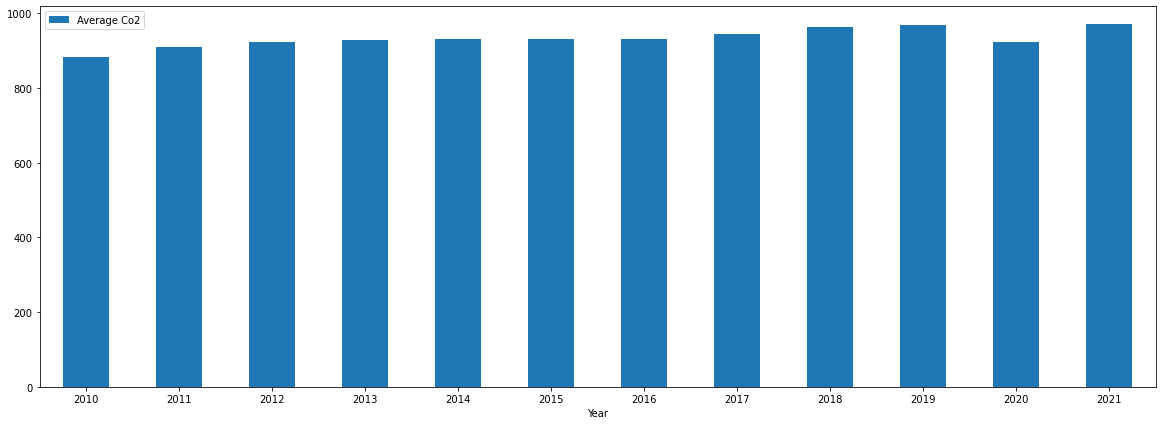

In [339]:
average_co2_df.plot(x="Year", y=["Average Co2"], kind="bar", rot=0, align="center", figsize=(20,7))

In [340]:
average_temp_2010=cleaned_data1.loc[cleaned_data1['year']==2010, 'temperature_change_from_co2'].mean()
average_temp_2011=cleaned_data1.loc[cleaned_data1['year']==2011, 'temperature_change_from_co2'].mean()
average_temp_2012=cleaned_data1.loc[cleaned_data1['year']==2012, 'temperature_change_from_co2'].mean()
average_temp_2013=cleaned_data1.loc[cleaned_data1['year']==2013, 'temperature_change_from_co2'].mean()
average_temp_2014=cleaned_data1.loc[cleaned_data1['year']==2014, 'temperature_change_from_co2'].mean()
average_temp_2015=cleaned_data1.loc[cleaned_data1['year']==2015, 'temperature_change_from_co2'].mean()
average_temp_2016=cleaned_data1.loc[cleaned_data1['year']==2016, 'temperature_change_from_co2'].mean()
average_temp_2017=cleaned_data1.loc[cleaned_data1['year']==2017, 'temperature_change_from_co2'].mean()
average_temp_2018=cleaned_data1.loc[cleaned_data1['year']==2018, 'temperature_change_from_co2'].mean()
average_temp_2019=cleaned_data1.loc[cleaned_data1['year']==2019, 'temperature_change_from_co2'].mean()
average_temp_2020=cleaned_data1.loc[cleaned_data1['year']==2020, 'temperature_change_from_co2'].mean()
average_temp_2021=cleaned_data1.loc[cleaned_data1['year']==2021, 'temperature_change_from_co2'].mean()

average_temp_data={'Year':['2010','2011','2012','2013','2014',
                           '2015','2016','2017','2018','2019','2020','2021'],
                   'Average Temp':[average_temp_2010,average_temp_2011,
                                   average_temp_2012,average_temp_2013,average_temp_2014,
                                   average_temp_2015,average_temp_2016,
                                   average_temp_2017,average_temp_2018,average_temp_2019,
                                  average_temp_2020,average_temp_2021]}
average_temp_data_df=pd.DataFrame(average_temp_data)
merge_data_co2_temp=pd.merge(average_temp_data_df,average_co2_df, on=['Year'], how='right')
merge_data_co2_temp

,Year,Average Temp,Average Co2
0,2010,0.019582,882.173653
1,2011,0.019922,908.851379
2,2012,0.020283,922.141411
3,2013,0.020619,927.754246
4,2014,0.020984,932.155234
5,2015,0.021340,932.076879
6,2016,0.021717,931.338839
7,2017,0.022057,945.561452
8,2018,0.022443,962.661738
9,2019,0.022795,967.436964


Text(0.5, 1.0, 'Comparsing of Average temperature and Co2 Emission Average')

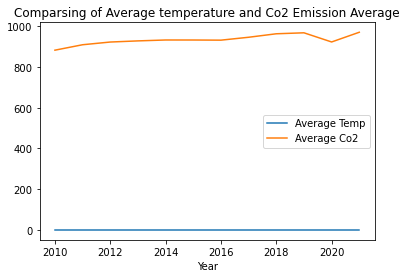

In [341]:
merge_data_co2_temp.plot(x="Year", y=["Average Temp", "Average Co2"], kind="line")
plt.title("Comparsing of Average temperature and Co2 Emission Average")

In [342]:
for col in emissionbyfactors_df.columns:
    
    print(col)

population
gdp
cement_co2
cement_co2_per_capita
co2
co2_growth_abs
co2_growth_prct
co2_including_luc
co2_including_luc_growth_abs
co2_including_luc_growth_prct
co2_including_luc_per_capita
co2_including_luc_per_gdp
co2_including_luc_per_unit_energy
co2_per_capita
co2_per_gdp
co2_per_unit_energy
coal_co2
coal_co2_per_capita
consumption_co2
consumption_co2_per_capita
consumption_co2_per_gdp
cumulative_cement_co2
cumulative_co2
cumulative_co2_including_luc
cumulative_coal_co2
cumulative_flaring_co2
cumulative_gas_co2
cumulative_luc_co2
cumulative_oil_co2
cumulative_other_co2
energy_per_capita
energy_per_gdp
flaring_co2
flaring_co2_per_capita
gas_co2
gas_co2_per_capita
ghg_excluding_lucf_per_capita
ghg_per_capita
land_use_change_co2
land_use_change_co2_per_capita
methane
methane_per_capita
nitrous_oxide
nitrous_oxide_per_capita
oil_co2
oil_co2_per_capita
other_co2_per_capita
other_industry_co2
primary_energy_consumption
share_global_cement_co2
share_global_co2
share_global_co2_including_lu

In [326]:
#set YEAR range 
cols = ['Country Name']
for i in range(1985, 2015):
    cols.append(str(i))

#set the path of the file and read source data using panda 
df_co2 = pd.read_csv('./data/CO2_emission.csv')
df_co2 = df_co2[cols]
df_co2 = df_co2.dropna()
df_co2.head()

,Country Name,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
1,Afghanistan,0.293957,0.267772,0.269230,0.246823,0.233882,0.210643,0.183364,0.096197,0.085087,...,0.051744,0.062428,0.083893,0.151721,0.238399,0.289988,0.406424,0.345149,0.310341,0.293946
2,Angola,0.471903,0.451619,0.544085,0.463508,0.437295,0.431744,0.415531,0.410523,0.441721,...,0.985736,1.105019,1.203134,1.185000,1.234425,1.244092,1.252681,1.330219,1.253776,1.290307
3,Albania,2.658015,2.665356,2.414061,2.331599,2.783243,1.678107,1.312213,0.774725,0.723790,...,1.412498,1.302576,1.322335,1.484311,1.495600,1.578574,1.803715,1.692908,1.749211,1.978763
5,Arab World,3.061850,3.284500,3.197806,3.295043,3.256674,3.016959,3.236645,3.415485,3.669446,...,4.185677,4.285719,4.117148,4.408948,4.562015,4.636813,4.559462,4.837780,4.674925,4.886988
6,United Arab Emirates,36.544811,32.657135,31.100021,29.726963,31.574754,28.444624,29.430225,28.319389,30.361763,...,25.314486,23.371860,21.985933,22.195490,21.214060,18.808520,18.491617,19.294920,18.559236,22.939606


In [343]:
# Cleaned data
cleaned_data=file_one_df1[['year','co2','population','gdp']]
df_drpna_gdp=cleaned_data.dropna()
group_by_year_co2=cleaned_data.groupby('year', as_index =False)['co2'].mean()
group_by_year_population=cleaned_data.groupby('year', as_index =False)['population'].mean()
merge_co2_population=pd.merge(group_by_year_co2,group_by_year_population, on=['year'], how="right")
df_drpna=merge_co2_population.dropna()

Text(0.5, 1.0, 'Comparsing of Population and Co2 Emission Average')

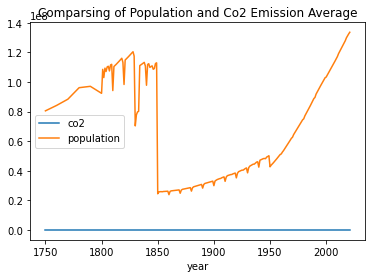

In [345]:
#Comparison population vs co2
df_drpna.plot(x="year", y=["co2", "population"], kind="line")
plt.title("Comparsing of Population and Co2 Emission Average")

Text(0.5, 1.0, 'Temperature changed from differnt chemicals ')

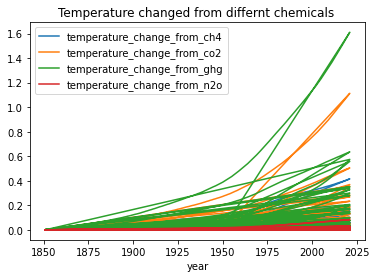

In [347]:
#Data clan
cleaned_data2=file_one_df1[['year','co2','temperature_change_from_ch4','temperature_change_from_co2',
                            'temperature_change_from_ghg','temperature_change_from_n2o']]
df_drpna_temp=cleaned_data2.dropna()
df_drpna_temp

#Comparison temperature vs co2
df_drpna_temp.plot(x="year", y=["temperature_change_from_ch4","temperature_change_from_co2",
                                "temperature_change_from_ghg","temperature_change_from_n2o"], kind="line")
plt.title("Temperature changed from differnt chemicals ")

# Sctter plots and regresion analysis 

Text(0, 0.5, 'GDP')

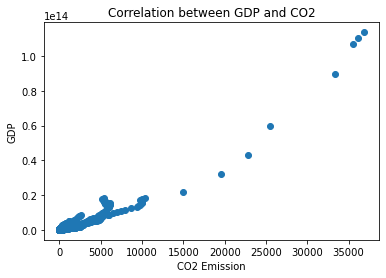

In [348]:
#Scatter plots GDP vs CO2
plt.scatter(df_drpna_gdp['co2'], df_drpna_gdp['gdp'])
plt.title("Correlation between GDP and CO2")
plt.xlabel('CO2 Emission')
plt.ylabel('GDP')

The correlation between both factors is 0.95


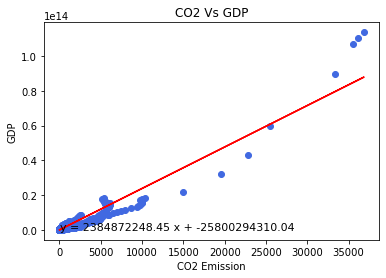

In [349]:
# Correlation analysis
correlation_coefficient = st.pearsonr(df_drpna_gdp['co2'], df_drpna_gdp['gdp'])

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(df_drpna_gdp['co2'], df_drpna_gdp['gdp'])
regress_values=df_drpna_gdp['co2']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(df_drpna_gdp['co2'], df_drpna_gdp['gdp'],color='royalblue')
plt.plot(df_drpna_gdp['co2'], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=11)
plt.xlabel("CO2 Emission")
plt.ylabel("GDP")
plt.title("CO2 Vs GDP")
print(f"The correlation between both factors is {round(correlation_coefficient[0],2)}")
plt.show()
plt.show()

Text(0, 0.5, 'Population')

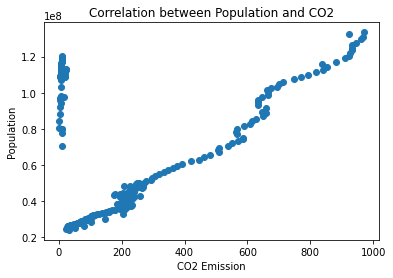

In [350]:
#Scatter plot population vs C02 em
plt.scatter(merge_co2_population['co2'], merge_co2_population['population'])
plt.title("Correlation between Population and CO2")
plt.xlabel('CO2 Emission')
plt.ylabel('Population')

The correlation between both factors is 0.35


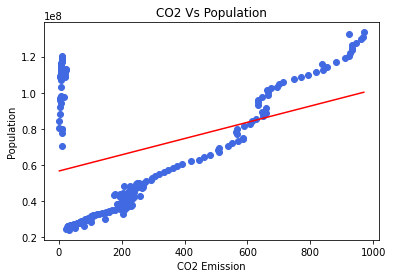

In [357]:
correlation_coefficient = st.pearsonr(df_drpna['co2'], df_drpna['population'])
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(df_drpna['co2'], df_drpna['population'])
regress_values=df_drpna['co2']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(df_drpna['co2'], df_drpna['population'],color='royalblue')
plt.plot(df_drpna['co2'], regress_values, color='red')
plt.annotate(line_eq,(5,5),c="red",fontsize=10)
plt.xlabel("CO2 Emission")
plt.ylabel("Population")
plt.title("CO2 Vs Population")
print(f"The correlation between both factors is {round(correlation_coefficient[0],2)}")
plt.show()


#  Two big C02 drops in history 

In [375]:
# Average CO2 emissions per year DataFrame
cols = ['Country Code']
for i in range(1985, 2015):
    cols.append(str(i)) 
    
    # CO2_emission is loaded to do a inner join of countries in each dataset
df_co2 = pd.read_csv('./data/CO2_emission.csv')
df_co2 = df_co2[cols]
df_co2 = df_co2.dropna()
df_co2.head()
row_average_CO2  = df_co2.mean()
df_co2.loc['AveC02'] = row_average_CO2
df_co2.fillna('')

C:\Users\user\AppData\Local\Temp\ipykernel_15196\3710647350.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  row_average_CO2  = df_co2.mean()


,Country Code,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
1,AFG,0.293957,0.267772,0.269230,0.246823,0.233882,0.210643,0.183364,0.096197,0.085087,...,0.051744,0.062428,0.083893,0.151721,0.238399,0.289988,0.406424,0.345149,0.310341,0.293946
2,AGO,0.471903,0.451619,0.544085,0.463508,0.437295,0.431744,0.415531,0.410523,0.441721,...,0.985736,1.105019,1.203134,1.185000,1.234425,1.244092,1.252681,1.330219,1.253776,1.290307
3,ALB,2.658015,2.665356,2.414061,2.331599,2.783243,1.678107,1.312213,0.774725,0.723790,...,1.412498,1.302576,1.322335,1.484311,1.495600,1.578574,1.803715,1.692908,1.749211,1.978763
5,ARB,3.061850,3.284500,3.197806,3.295043,3.256674,3.016959,3.236645,3.415485,3.669446,...,4.185677,4.285719,4.117148,4.408948,4.562015,4.636813,4.559462,4.837780,4.674925,4.886988
6,ARE,36.544811,32.657135,31.100021,29.726963,31.574754,28.444624,29.430225,28.319389,30.361763,...,25.314486,23.371860,21.985933,22.195490,21.214060,18.808520,18.491617,19.294920,18.559236,22.939606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,YEM,0.904474,0.831807,0.841254,0.894977,0.893385,0.819517,0.748475,0.768266,0.638507,...,0.996838,1.030386,0.985390,1.020428,1.090827,1.011975,0.826044,0.762823,1.013900,0.878996
246,ZAF,9.921215,9.877464,9.593208,9.773399,9.493669,8.513600,8.653758,7.801071,8.100407,...,8.707407,9.236950,9.498786,9.979458,9.967159,9.256681,9.048936,8.872523,8.686590,8.979062
247,ZMB,0.397784,0.404311,0.366559,0.413596,0.332929,0.304334,0.293034,0.290710,0.288904,...,0.192996,0.188267,0.154271,0.168958,0.189800,0.197823,0.209458,0.253506,0.265078,0.292412
248,ZWE,1.156175,1.426918,1.599635,1.634845,1.594088,1.499501,1.493786,1.560590,1.475029,...,0.891798,0.859470,0.806649,0.627678,0.447289,0.612528,0.741686,0.594152,0.874563,0.884721


C:\Users\user\AppData\Local\Temp\ipykernel_15196\956465446.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.plot(df_co2.mean(), color='r', marker='.', mfc='none', mec='r')


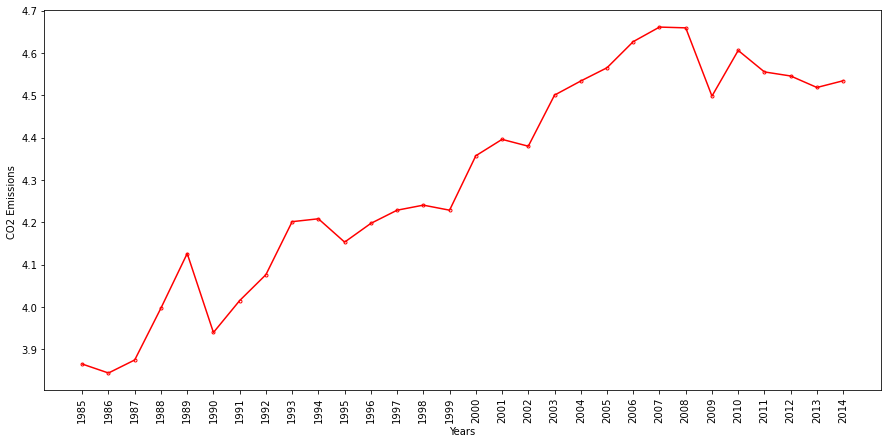

In [376]:
#Plot C02 emissions 
plt.figure(figsize=(15,7))
plt.plot(df_co2.mean(), color='r', marker='.', mfc='none', mec='r')
plt.xlabel("Years")
plt.xticks(rotation=90)
plt.ylabel("CO2 Emissions ")
#plt.legend("Air polution")
plt.show()

In [380]:
cols2 = ['Country Name']
for i in range(1989, 2001):
    cols2.append(str(i))
    
# CO2 Emissions in the 90s
df_co2b = pd.read_csv('./data/CO2_emission.csv')
df_co2b= df_co2b[cols2]
df_co2b.head()

,Country Name,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,Aruba,10.634733,26.374503,26.046130,21.442559,22.000786,21.036245,20.771936,20.318353,20.426818,20.587669,20.311567,26.194875
1,Afghanistan,0.233882,0.210643,0.183364,0.096197,0.085087,0.075806,0.068640,0.062435,0.056642,0.052763,0.040723,0.037235
2,Angola,0.437295,0.431744,0.415531,0.410523,0.441721,0.288119,0.787033,0.726233,0.496361,0.475815,0.577083,0.581961
3,Albania,2.783243,1.678107,1.312213,0.774725,0.723790,0.600204,0.654537,0.636625,0.490365,0.560271,0.960164,0.978175
4,Andorra,NaN,7.467336,7.182457,6.912053,6.736055,6.494200,6.662052,7.065071,7.239713,7.660784,7.975454,8.019284


In [218]:
# Sort the Country 1989 CO2 Emissions in descending order and display the top 10 rows.
top_countries90s = co2_source90s.sort_values(["1989"],ascending = False)
top_countries90s.head(6)

,Country Name,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
195,United Arab Emirates,31.574754,28.444624,29.430225,28.319389,30.361763,31.873893,29.249878,16.170682,15.589845,28.968791,26.424104,35.915764
158,Qatar,31.031577,24.722404,36.327418,54.102490,61.263036,59.607436,61.913951,61.812478,70.042227,58.745185,55.054269,58.619465
114,Luxembourg,25.613572,26.197659,27.431434,26.957254,27.142120,25.291538,20.353028,20.370009,18.927298,17.320466,17.854770,18.885512
22,Brunei Darussalam,25.243090,23.939158,19.945967,19.038431,17.639759,16.215910,16.118736,15.986291,16.221607,16.511290,11.983146,14.143427
10,Bahrain,24.399053,25.058855,23.300010,20.841680,27.307083,26.909513,26.287788,26.995573,29.111344,29.989690,28.308684,28.051037
197,United States,20.075770,19.322751,19.056163,19.139437,19.347083,19.360892,19.276545,19.496025,19.690363,19.579236,19.727170,20.178751


In [200]:
#Transpose Data Frame
top_90sT=top_countries90s.transpose()
top_90sT=top_90sT.rename(index={'Country Name': 'Year'})
top_90sT.head()


,195,158,114,22,10,197,141,133,29,7,...,131,117,58,102,27,25,120,134,194,34
Year,United Arab Emirates,Qatar,Luxembourg,Brunei Darussalam,Bahrain,United States,North America,Nauru,Canada,Australia,...,Mozambique,Malawi,Ethiopia,Lao PDR,Cambodia,Burundi,Mali,Nepal,Uganda,Chad
1989,31.574754,31.031577,25.613572,25.24309,24.399053,20.07577,19.766716,16.99515,16.984193,16.519863,...,0.081324,0.062224,0.0611,0.056704,0.051895,0.05044,0.050385,0.049503,0.047907,0.017783
1990,28.444624,24.722404,26.197659,23.939158,25.058855,19.322751,18.960309,13.117096,15.715541,15.452882,...,0.078776,0.079544,0.063021,0.049944,0.140542,0.03843,0.049906,0.033556,0.043739,0.023982
1991,29.430225,36.327418,27.431434,19.945967,23.30001,19.056163,18.671603,12.769152,15.221805,15.127966,...,0.076762,0.082886,0.060168,0.053591,0.140533,0.042832,0.050532,0.049509,0.043505,0.01072
1992,28.319389,54.10249,26.957254,19.038431,20.84168,19.139437,18.779048,12.064905,15.543148,15.317769,...,0.072777,0.082154,0.05769,0.057038,0.140219,0.038053,0.050134,0.066762,0.042475,0.013268


In [268]:
# Convert first row to a colum header
header_row = 0
top_90sT.columns = top_90sT.iloc[header_row]
top_90sT.dropna()
top_90sT.head()
top_90sT1 = top_90sT.tail(-1)
top_90sT1.head()

Year,United Arab Emirates,Qatar,Luxembourg,Brunei Darussalam,Bahrain,United States,North America,Nauru,Canada,Australia,...,Mozambique,Malawi,Ethiopia,Lao PDR,Cambodia,Burundi,Mali,Nepal,Uganda,Chad
1989,31.574754,31.031577,25.613572,25.24309,24.399053,20.07577,19.766716,16.99515,16.984193,16.519863,...,0.081324,0.062224,0.0611,0.056704,0.051895,0.05044,0.050385,0.049503,0.047907,0.017783
1990,28.444624,24.722404,26.197659,23.939158,25.058855,19.322751,18.960309,13.117096,15.715541,15.452882,...,0.078776,0.079544,0.063021,0.049944,0.140542,0.03843,0.049906,0.033556,0.043739,0.023982
1991,29.430225,36.327418,27.431434,19.945967,23.30001,19.056163,18.671603,12.769152,15.221805,15.127966,...,0.076762,0.082886,0.060168,0.053591,0.140533,0.042832,0.050532,0.049509,0.043505,0.01072
1992,28.319389,54.10249,26.957254,19.038431,20.84168,19.139437,18.779048,12.064905,15.543148,15.317769,...,0.072777,0.082154,0.05769,0.057038,0.140219,0.038053,0.050134,0.066762,0.042475,0.013268
1993,30.361763,61.263036,27.14212,17.639759,27.307083,19.347083,18.966063,11.050549,15.533711,15.701452,...,0.075019,0.091766,0.056833,0.055561,0.139019,0.039212,0.050038,0.071586,0.040732,0.013966


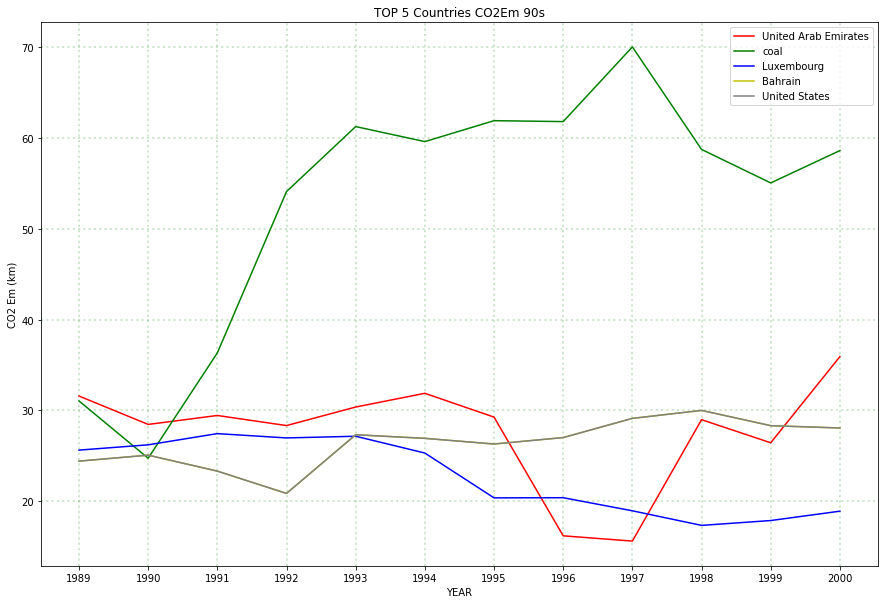

In [259]:
#plot source co2 emission 1750-2022
plt.rcParams['figure.figsize'] = [2, 1]
x_axis = top_90sT1.index

y_UAE_axis = top_90sT1['United Arab Emirates']
y_QT_axis = top_90sT1['Qatar']
y_LUX_axis = top_90sT1['Luxembourg']
y_Bah_axis = top_90sT1['Bahrain']
y_USA_axis = top_90sT1['United States']
plt.rcParams['figure.figsize'] = [15, 10]
plt.plot(x_axis, y_UAE_axis, color='r', label='United Arab Emirates')
plt.plot(x_axis, y_QT_axis, color='g', label='coal')
plt.plot(x_axis, y_LUX_axis, color='b', label='Luxembourg')
plt.plot(x_axis, y_Bah_axis, color='y', label='Bahrain')
plt.plot(x_axis, y_Bah_axis, color='gray', label='United States')
plt.grid(color='g', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel('YEAR')
plt.ylabel('CO2 Em (km)')
plt.title('TOP 5 Countries CO2Em 90s')
plt.legend()
plt.show()

In [269]:
cols3 = ['Country Name']
for i in range(2000, 2011):
    cols3.append(str(i))
    
# CO2 Emissions in the 2000s
part_source_data = df_co2[cols3]
co2_source2000s = part_source_data.groupby('Country Name', as_index =False).sum()
top_countries2000s = co2_source2000s.sort_values(["2000"],ascending = False)
top_countries2000s.head(7)


,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
158,Qatar,58.619465,67.310496,63.828097,60.900809,57.005574,58.881084,62.066185,51.933672,45.134782,41.827221,39.059708
195,United Arab Emirates,35.915764,30.706382,24.348796,28.783316,27.833029,25.314486,23.371860,21.985933,22.195490,21.214060,18.808520
10,Bahrain,28.051037,19.966118,21.354162,21.148488,21.100261,21.602028,19.647007,25.915257,26.706990,23.810764,23.585519
197,United States,20.178751,19.636505,19.613404,19.564105,19.658371,19.591885,19.094067,19.217898,18.461764,17.157738,17.442862
141,North America,19.905351,19.377325,19.311195,19.356955,19.423242,19.363187,18.856387,18.983836,18.303713,17.037665,17.271051
114,Luxembourg,18.885512,19.932733,21.105746,21.930711,24.599026,24.824647,24.012858,22.957283,22.385472,20.877125,21.635136
191,Trinidad and Tobago,18.813172,20.725123,22.408897,24.920741,25.913838,29.426463,32.763568,34.754429,33.767435,33.987479,36.091656


In [263]:
#Transpose Data Frame
top_2000sT=top_countries2000s.transpose()
top_2000sT=top_2000sT.rename(index={'Country Name': 'Year'})
top_2000sT.head()

,158,195,10,197,141,114,191,29,7,60,...,32,160,139,194,170,58,25,0,34,39
Year,Qatar,United Arab Emirates,Bahrain,United States,North America,Luxembourg,Trinidad and Tobago,Canada,Australia,Faroe Islands,...,Central African Republic,Rwanda,Niger,Uganda,Somalia,Ethiopia,Burundi,Afghanistan,Chad,"Congo, Dem. Rep."
2000,58.619465,35.915764,28.051037,20.178751,19.905351,18.885512,18.813172,17.414639,17.20061,14.751171,...,0.073533,0.066558,0.061486,0.06047,0.054144,0.0536,0.04254,0.037235,0.021065,0.017282
2001,67.310496,30.706382,19.966118,19.636505,19.377325,19.932733,20.725123,17.018428,16.733367,16.229461,...,0.06601,0.064598,0.055857,0.061946,0.054685,0.063861,0.031469,0.037846,0.01986,0.017264
2002,63.828097,24.348796,21.354162,19.613404,19.311195,21.105746,22.408897,16.560392,17.370452,15.372007,...,0.064619,0.063096,0.057457,0.061925,0.061751,0.064461,0.031725,0.047377,0.018702,0.018603
2003,60.900809,28.783316,21.148488,19.564105,19.356955,21.930711,24.920741,17.478841,16.901959,15.462135,...,0.060468,0.060851,0.060015,0.061539,0.060523,0.069102,0.023353,0.050481,0.040684,0.019182


In [264]:
# Convert first row to a colum header
header_row = 0
top_2000sT.columns = top_2000sT.iloc[header_row]
top_2000sT.dropna()
top_2000sT.head()
top_2000sT1 = top_90sT.tail(-1)
top_2000sT1.head()

Year,United Arab Emirates,Qatar,Luxembourg,Brunei Darussalam,Bahrain,United States,North America,Nauru,Canada,Australia,...,Mozambique,Malawi,Ethiopia,Lao PDR,Cambodia,Burundi,Mali,Nepal,Uganda,Chad
1989,31.574754,31.031577,25.613572,25.24309,24.399053,20.07577,19.766716,16.99515,16.984193,16.519863,...,0.081324,0.062224,0.0611,0.056704,0.051895,0.05044,0.050385,0.049503,0.047907,0.017783
1990,28.444624,24.722404,26.197659,23.939158,25.058855,19.322751,18.960309,13.117096,15.715541,15.452882,...,0.078776,0.079544,0.063021,0.049944,0.140542,0.03843,0.049906,0.033556,0.043739,0.023982
1991,29.430225,36.327418,27.431434,19.945967,23.30001,19.056163,18.671603,12.769152,15.221805,15.127966,...,0.076762,0.082886,0.060168,0.053591,0.140533,0.042832,0.050532,0.049509,0.043505,0.01072
1992,28.319389,54.10249,26.957254,19.038431,20.84168,19.139437,18.779048,12.064905,15.543148,15.317769,...,0.072777,0.082154,0.05769,0.057038,0.140219,0.038053,0.050134,0.066762,0.042475,0.013268
1993,30.361763,61.263036,27.14212,17.639759,27.307083,19.347083,18.966063,11.050549,15.533711,15.701452,...,0.075019,0.091766,0.056833,0.055561,0.139019,0.039212,0.050038,0.071586,0.040732,0.013966


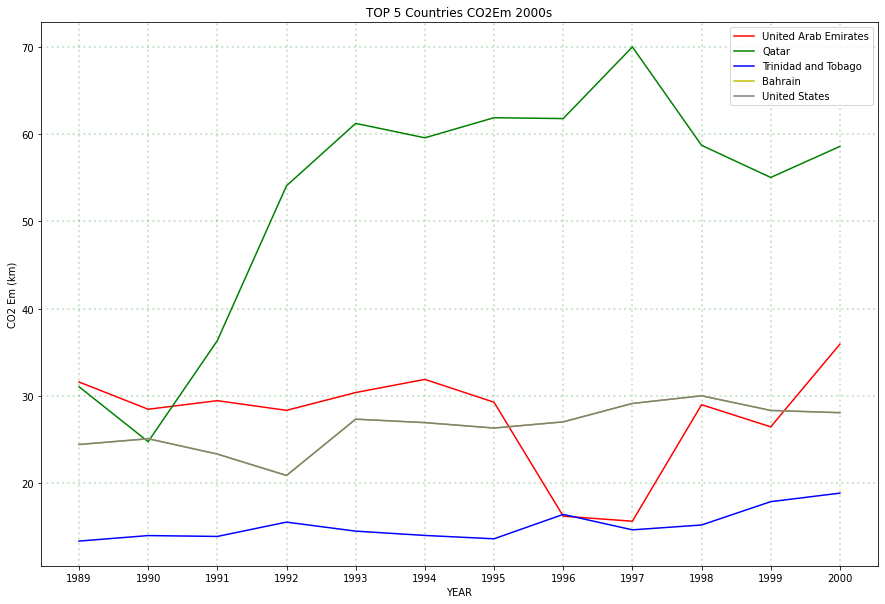

In [267]:
#plot source co2 emission 1750-2022
plt.rcParams['figure.figsize'] = [2, 1]
x_axis = top_2000sT1.index

y_UAE_axis = top_2000sT1['United Arab Emirates']
y_QT_axis = top_2000sT1['Qatar']
y_LUX_axis = top_2000sT1['Trinidad and Tobago']
y_Bah_axis = top_2000sT1['Bahrain']
y_USA_axis = top_2000sT1['United States']
plt.rcParams['figure.figsize'] = [15, 10]
plt.plot(x_axis, y_UAE_axis, color='r', label='United Arab Emirates')
plt.plot(x_axis, y_QT_axis, color='g', label='Qatar')
plt.plot(x_axis, y_LUX_axis, color='b', label='Trinidad and Tobago')
plt.plot(x_axis, y_Bah_axis, color='y', label='Bahrain')
plt.plot(x_axis, y_Bah_axis, color='gray', label='United States')
plt.grid(color='g', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel('YEAR')
plt.ylabel('CO2 Em (km)')
plt.title('TOP 5 Countries CO2Em 2000s')
plt.legend()
plt.show()